In [1]:
import tensorflow as tf


In [3]:
tf.keras.__version__


'2.5.0'

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [7]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [12]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
     
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [24]:
model.layers[1].name

'dense_3'

In [33]:
weights,biases = model.layers[1].get_weights()

In [35]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [36]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7131 - accuracy: 0.7662 - val_loss: 0.5006 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4866 - accuracy: 0.8301 - val_loss: 0.4378 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4433 - accuracy: 0.8456 - val_loss: 0.4187 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4151 - accuracy: 0.8535 - val_loss: 0.4050 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8612 - val_loss: 0.3760 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3794 - accuracy: 0.8669 - val_loss: 0.3804 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8703 - val_loss: 0.3676 - val_accuracy:

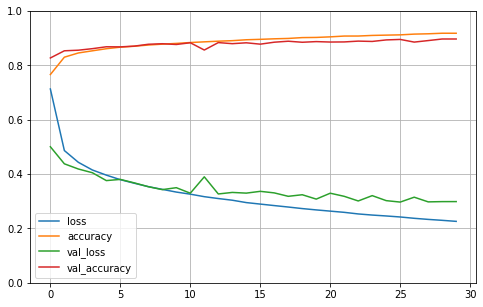

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.8281 - accuracy: 0.8345


[75.82814025878906, 0.8345000147819519]

In [58]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
import numpy as np

In [60]:
 y_pred = np.argmax(model.predict(X_new), axis=-1)
 print(y_pred)

[9 2 1]


In [62]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')